# Student Performance Indicator

#### Workflow of a Machine Learning Project

- Data Collection
- Data Warehousing/Storage
- Fetching the data from a repository
- Performing Exploratry Data Analysis
- Data Visualization
- Data Pre-Processing
- Model selection
- Model training
- Choosing the best performing model
- Deployment

# 1) Problem Statement:
- The problem statement is to analyis the effects of various different factors like exam preparations, parental behaviours, student behaviour, etc.

# 2) Data Collection
- This dataset has been collected from kaggle https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

# 3) Importing the necessary libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# 4) Loading the data

In [151]:
df = pd.read_csv(r"C:\Users\asd\Desktop\MachineLearning\MLProjects\notebooks\data\stud.csv")

# 5) Exploratry Data Analysis
#### Display the top five rows of our data

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 5.1) Information about the dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Insights:
- There are 8 unique features & 1000 different rows

### 5.2) Data Checks
#### Checking overall null values in each feature

In [45]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Checking the percentage of the missing values

In [49]:
df.isnull().sum()*100/len(df)

gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

##### Insights:
- The data is clean from null values

#### Checking for duplicated values

In [61]:
df.duplicated().sum()

0

#### Checking the data types of the features

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Insights:
- The data contains 2 data types categorical data (object) & numerical data (int)

#### Checking the unique values in each categorical feature
##### Checking the overall number of unique values in the features

In [84]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### Printing out the unique values in categorical features

In [80]:
for i in df.select_dtypes(include = ["object"]):
    print(f"Unique values in {i}: {df[i].unique()}")
    print("---------------------------------------------------------------------------------------------------------------------------")

Unique values in gender: ['female' 'male']
---------------------------------------------------------------------------------------------------------------------------
Unique values in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
---------------------------------------------------------------------------------------------------------------------------
Unique values in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
---------------------------------------------------------------------------------------------------------------------------
Unique values in lunch: ['standard' 'free/reduced']
---------------------------------------------------------------------------------------------------------------------------
Unique values in test_preparation_course: ['none' 'completed']
---------------------------------------------------------------------------------------------------------

##### Insights:
- Unique categories in gender feature -> sex of the students ( male/female )
- Unique categories in race_ethnicity -> categorization of students based on their race & ethnicit ( groups [A , B , C , D , E] )
- Unique categories in parental_level_of_education ->  education level of the parents, how well educated the parents are.]
- Unique categories inlunch -> having lunch before test
- Unique categories in test_preparation_course -> whether the student has completed the preparation course for the test.e


#### Checking the statistics

In [96]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights:
- all the means are close to each other i.e between 66 - 68
- all the std are close to each oether i.3 between 15.16 - 15.19
- the lowest score scored by a student in maths is 0 while in the writing & reading the lowest is 10 and 17 respectively.


### 5.3) Feature Engineering
#### Creating average score feature

In [153]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [155]:
total_marks = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = total_marks/3

#### Creatng a grade feature

In [161]:
def grading(average):
    return ( "A+" if average >= 90 else
             "A" if average >= 80 else
             "B" if average >= 70 else
             "C" if average >= 60 else
             "D" if average >= 50 else
             "F" )

df["grade"] = [grading(avg) for avg in df["average_score"]]

#### Creating Degree type & Educated or Not Educated feature

In [186]:
# replacing some values
replacing_map = {
    "some college" : "college",
    "some high school" : "high school"
}

df["parental_level_of_education"] = df["parental_level_of_education"].replace(replacing_map)

# Educated or Not Educated feature
degrees = ["bachelor's degree", "master's degree","associate's degree"]
df["educated_or_not_educated_parents"] = df["parental_level_of_education"].apply(lambda x: "educated" if x in degrees else "not educated")

# Degree type feature
degree_map = {
    "bachelor's degree" : "graduate",
    "college" : "no degree",
    "master's degree" : "post graduate",
    "associate's degree" : "graduate",
    "high school" : "no degree"
    
}

df["parent_degree_type"] = df["parental_level_of_education"].map(degree_map)

In [192]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,grade,educated_or_not_educated_parents,parent_degree_type
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B,educated,graduate
1,female,group C,college,standard,completed,69,90,88,82.333333,A,not educated,no degree
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A+,educated,post graduate
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,educated,graduate
4,male,group C,college,standard,none,76,78,75,76.333333,B,not educated,no degree


# 6) Data Visualization

### 6.1) Distribution of numerical features

##### Average Score Distribution

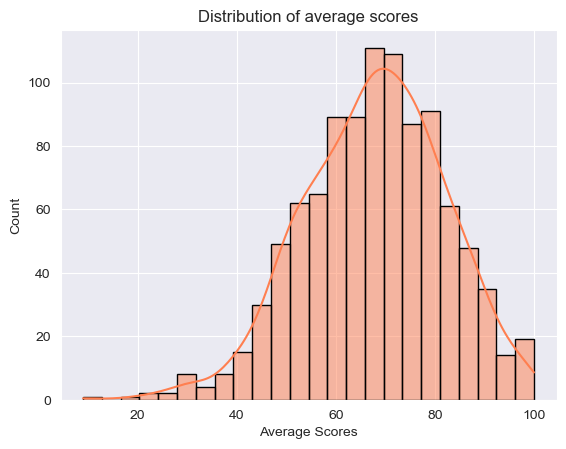

In [229]:
sns.histplot(data = df , x = "average_score" , kde = True , color = "coral", edgecolor = "black")
plt.title("Distribution of average scores")
plt.xlabel("Average Scores")
plt.ylabel("Count")
plt.show()

##### Insights:
- The data is almost normally distribution, no skewdness is present

##### Math , Reading & Writing Score Distribution

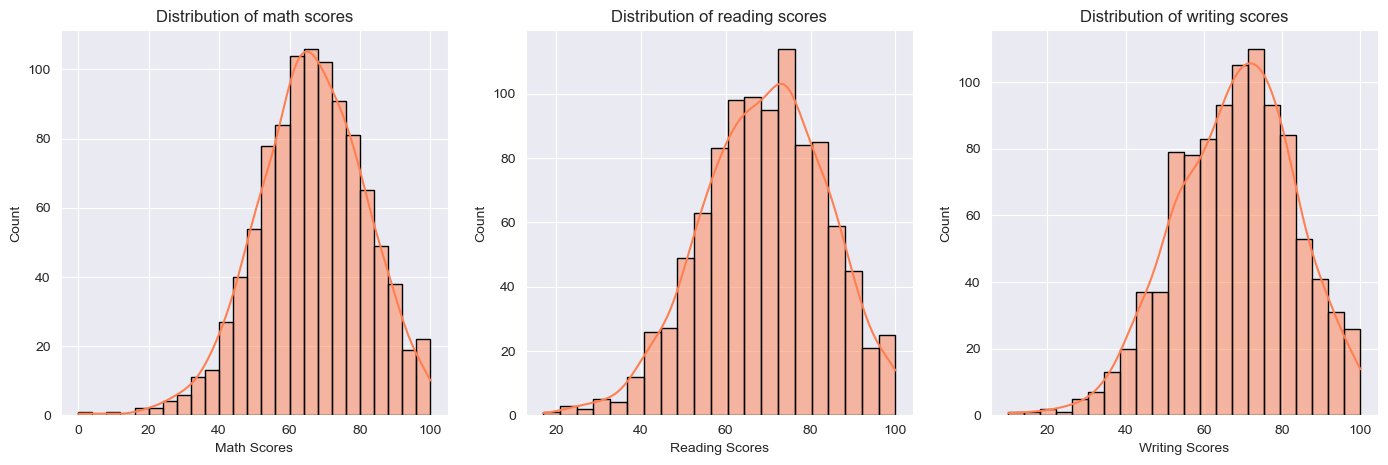

In [227]:
plt.figure(figsize = (17,5))
plt.subplot(1,3,1)
sns.histplot(data = df , x = "math_score" , kde = True , color = "coral", edgecolor = "black")
plt.title("Distribution of math scores")
plt.xlabel("Math Scores")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.histplot(data = df , x = "reading_score" , kde = True , color = "coral", edgecolor = "black")
plt.title("Distribution of reading scores")
plt.xlabel("Reading Scores")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.histplot(data = df , x = "writing_score" , kde = True , color = "coral", edgecolor = "black")
plt.title("Distribution of writing scores")
plt.xlabel("Writing Scores")
plt.ylabel("Count")
plt.show()

##### Insights:
- The data is almost normally distribution, no skewdness is present

##### Violin plots of math , reading & writing scores

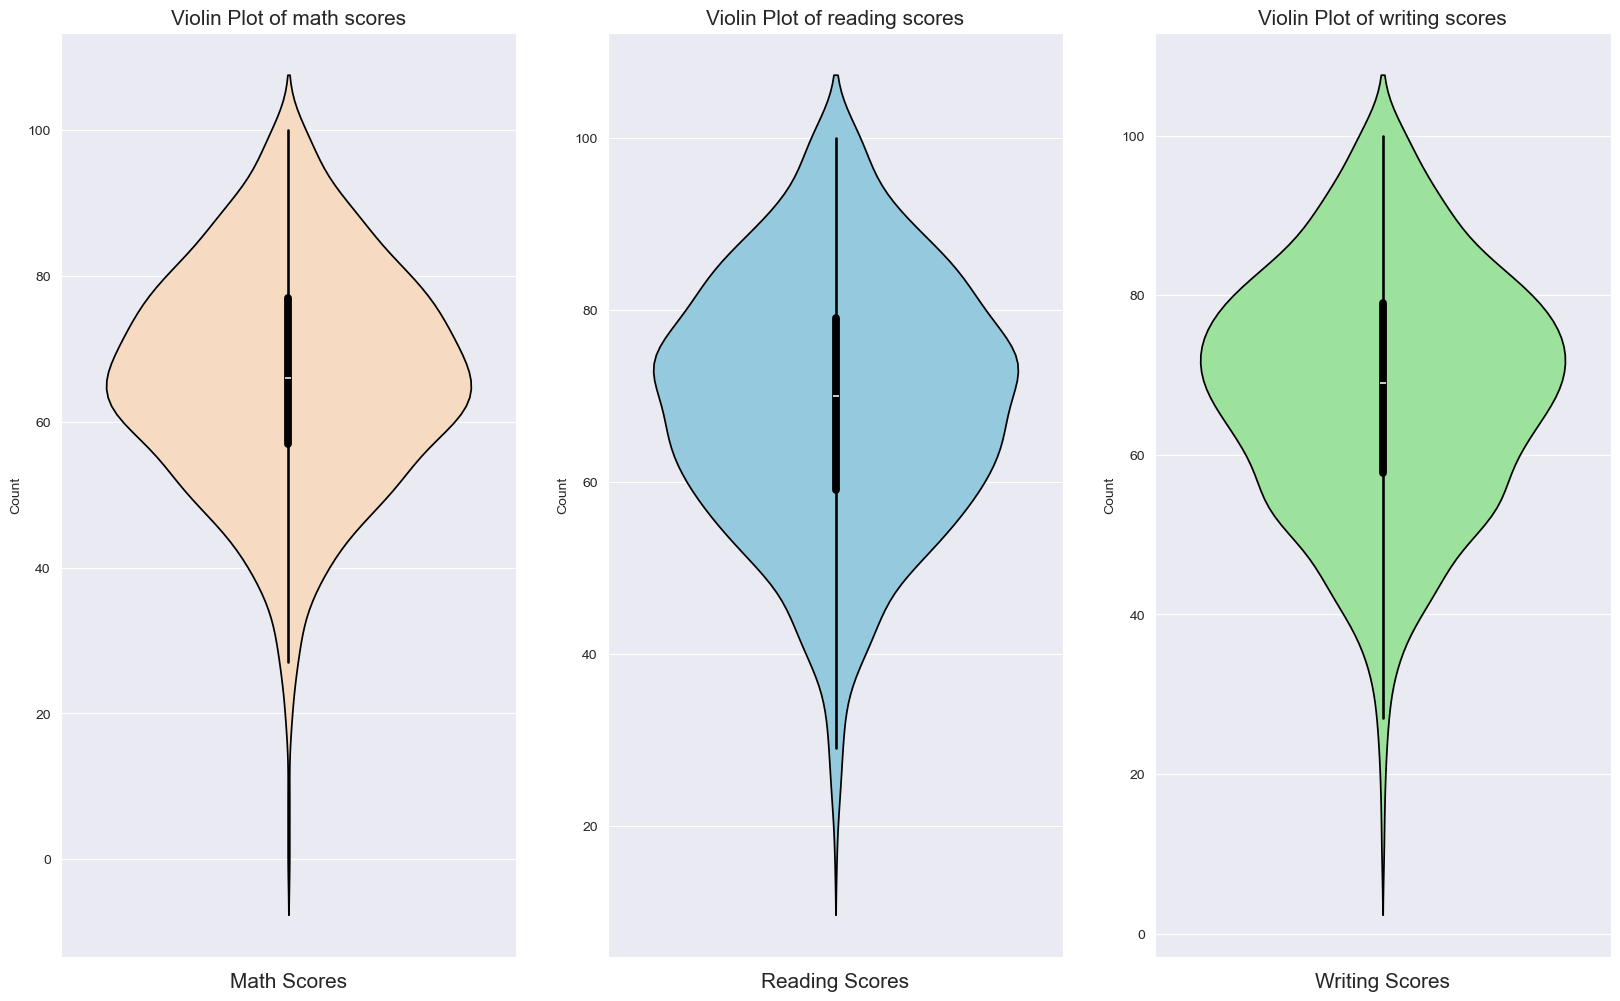

In [263]:
plt.figure(figsize = (20,12))
plt.subplot(1,3,1)
sns.violinplot(data = df , y = "math_score" , color = "Peachpuff", edgecolor = "black")
plt.title("Violin Plot of math scores",fontsize = 15)
plt.xlabel("Math Scores",fontsize = 15)
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.violinplot(data = df , y = "reading_score" , color = "skyblue", edgecolor = "black")
plt.title("Violin Plot of reading scores",fontsize = 15)
plt.xlabel("Reading Scores",fontsize = 15)
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.violinplot(data = df , y = "writing_score", color = "Lightgreen", edgecolor = "black")
plt.title("Violin Plot of writing scores",fontsize = 15)
plt.xlabel("Writing Scores",fontsize = 15)
plt.ylabel("Count")
plt.show()

##### Insights:
- The students scored from approximately 55 to 75 on an average in maths. While in reading & writing it seems to be around 55 to 80.

##### Piecharts for categorical features

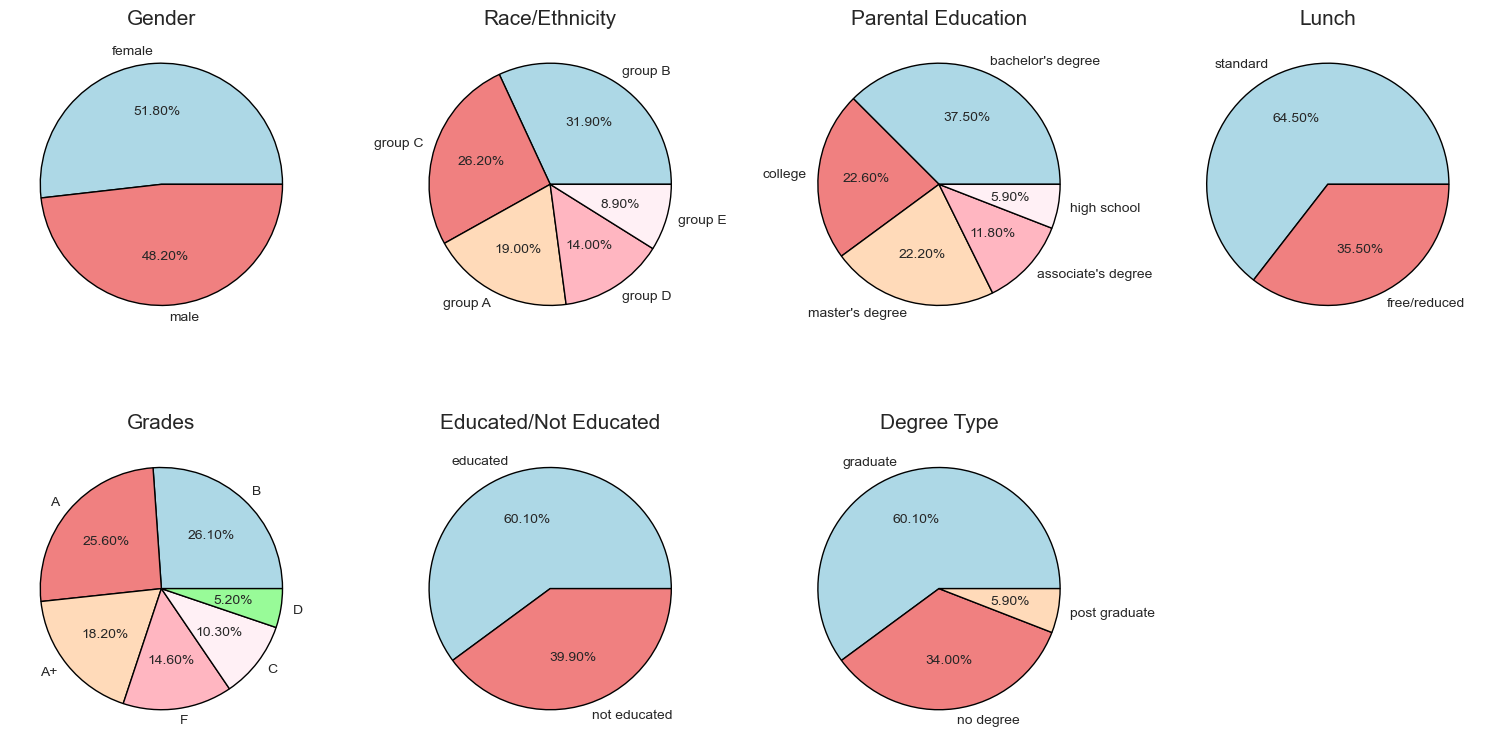

In [344]:
plt.figure(figsize = (15,12))
plt.subplot(2,4,1)
size = df["gender"].value_counts()
colors = ["Lightblue","lightcoral"]

plt.pie(size , colors = colors , labels = df["gender"].unique(), autopct = "%.2f%%", wedgeprops = {"edgecolor":"black"})
plt.title("Gender",fontsize = 15)

plt.subplot(2,4,2)
size = df["race_ethnicity"].value_counts()
colors = ["Lightblue","lightcoral","Peachpuff","Lightpink","Lavenderblush"]

plt.pie(size , colors = colors , labels = df["race_ethnicity"].unique(), autopct = "%.2f%%", wedgeprops = {"edgecolor":"black"})
plt.title("Race/Ethnicity",fontsize = 15)

plt.subplot(2,4,3)
size = df["parental_level_of_education"].value_counts()
colors = ["Lightblue","lightcoral","Peachpuff","Lightpink","Lavenderblush"]

plt.pie(size , colors = colors , labels = df["parental_level_of_education"].unique(), autopct = "%.2f%%", wedgeprops = {"edgecolor":"black"})
plt.title("Parental Education",fontsize = 15)

plt.subplot(2,4,4)
size = df["lunch"].value_counts()
colors = ["Lightblue","lightcoral"]

plt.pie(size , colors = colors , labels = df["lunch"].unique(), autopct = "%.2f%%", wedgeprops = {"edgecolor":"black"})
plt.title("Lunch",fontsize = 15)

plt.subplot(2,4,5)
size = df["grade"].value_counts()
colors = ["Lightblue","lightcoral","Peachpuff","Lightpink","Lavenderblush","Palegreen"]

plt.pie(size , colors = colors , labels = df["grade"].unique(), autopct = "%.2f%%", wedgeprops = {"edgecolor":"black"})
plt.title("Grades",fontsize = 15)

plt.subplot(2,4,6)
size = df["educated_or_not_educated_parents"].value_counts()
colors = ["Lightblue","lightcoral"]

plt.pie(size , colors = colors , labels = df["educated_or_not_educated_parents"].unique(), autopct = "%.2f%%", wedgeprops = {"edgecolor":"black"})
plt.title("Educated/Not Educated",fontsize = 15)

plt.subplot(2,4,7)
size = df["parent_degree_type"].value_counts()
colors = ["Lightblue","lightcoral","Peachpuff"]

plt.pie(size , colors = colors , labels = df["parent_degree_type"].unique(), autopct = "%.2f%%", wedgeprops = {"edgecolor":"black"})
plt.title("Degree Type",fontsize = 15)

plt.tight_layout(h_pad = -20)
plt.show()

### 6.2) Feature Vise Visualization

#### Gender Feature
- what is gender distribution in the dataset?
- does gender has an effect on student performance (average)

##### UNIVARIATE ANALYSIS ( Distribution of feature)

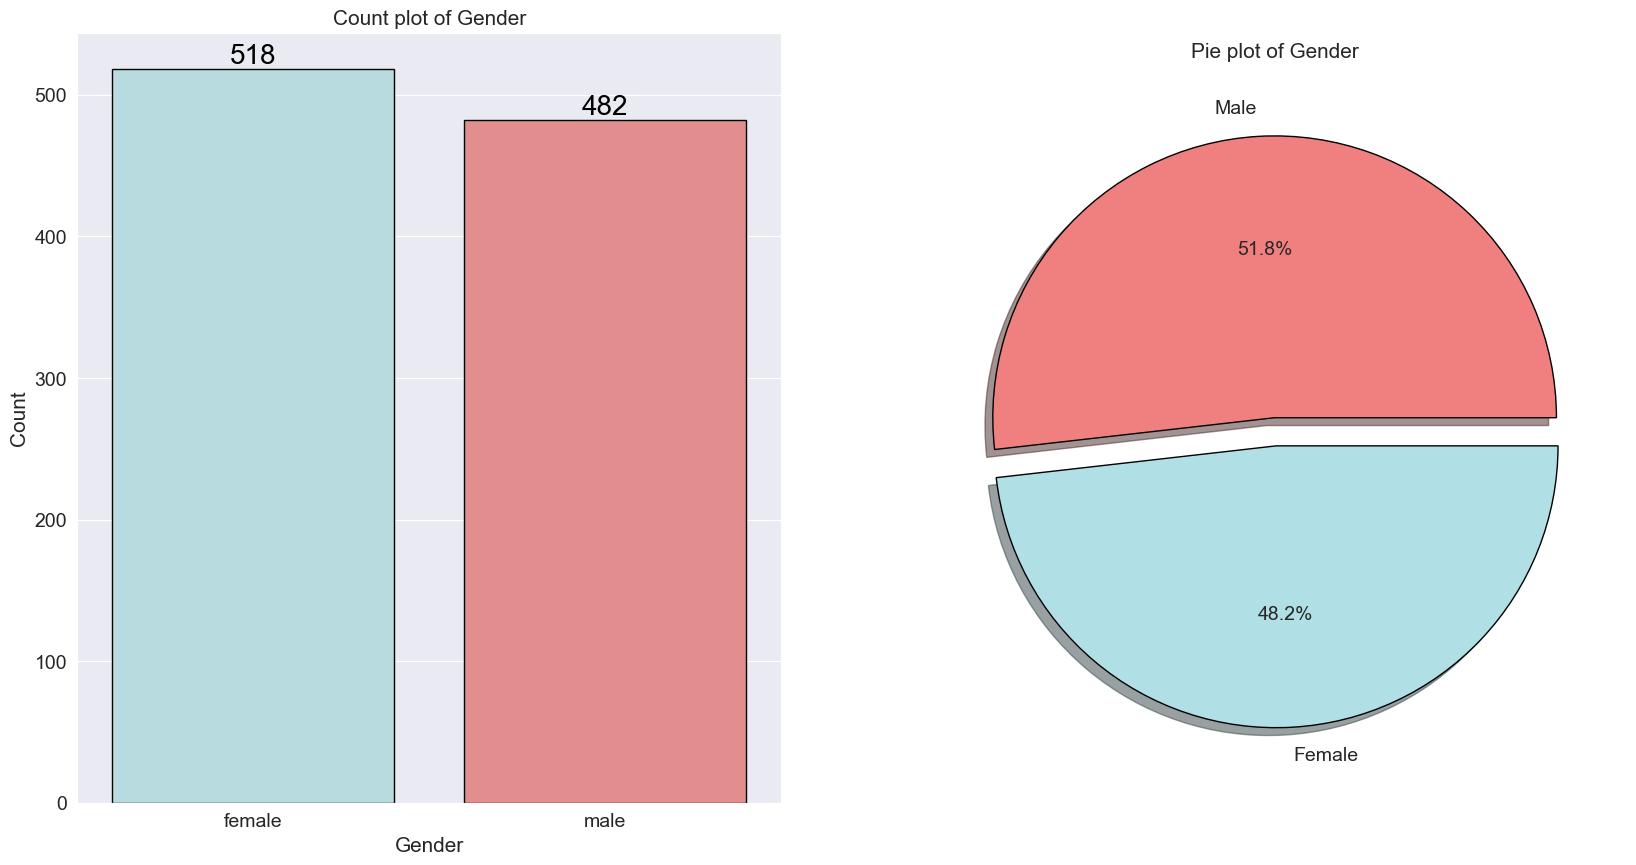

In [464]:
f,ax=plt.subplots(1,2,figsize=(20,10))

custom_palette = ['powderblue','lightcoral']
sns.countplot(data = df , x = "gender" , palette = custom_palette , ax = ax[0], edgecolor = 'black')
ax[0].set_title("Count plot of Gender",fontsize = 15)
ax[0].set_xlabel("Gender",fontsize = 15)
ax[0].set_ylabel("Count",fontsize = 15)
ax[0].tick_params(axis = "both",labelsize = 14)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',textprops={'fontsize': 14},
        shadow=True,colors=['lightcoral','powderblue'], wedgeprops = {"edgecolor":"black"})
plt.title("Pie plot of Gender",fontsize = 15)

plt.show()

##### BIVARIATE ANALYSIS ( is student performance affected by gender? )

In [402]:
gender_group_score = df.groupby('gender')[["average_score","math_score","reading_score","writing_score"]].mean()

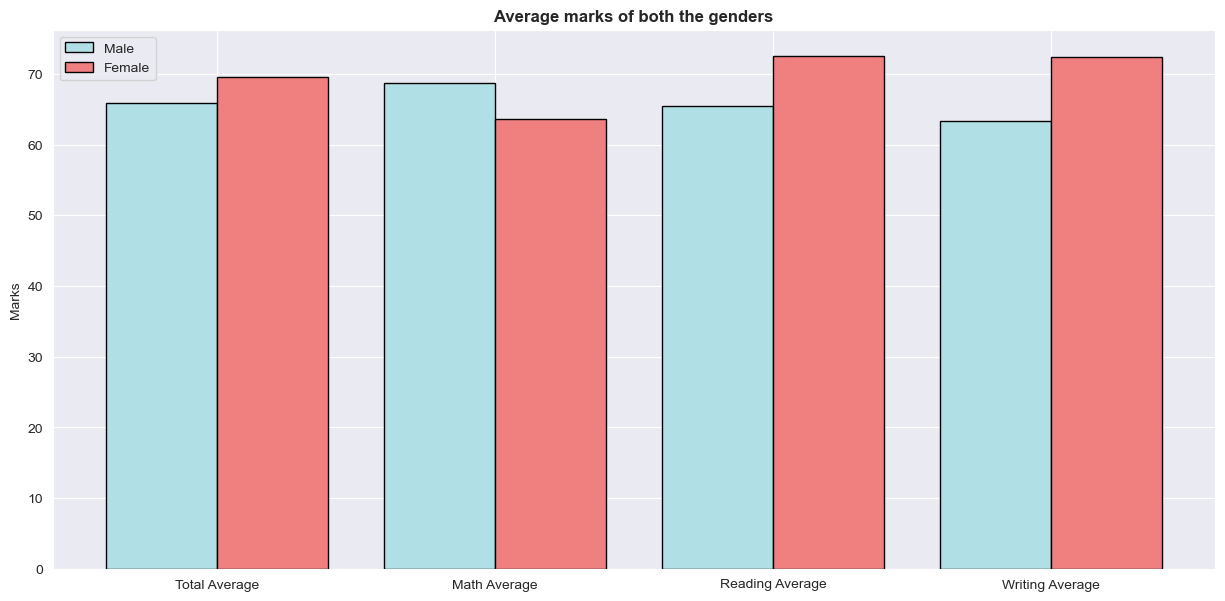

In [438]:
plt.figure(figsize = (15,7))

X = ["Total Average","Math Average","Reading Average","Writing Average"]

female_scores = gender_group_score["average_score"][0],gender_group_score["math_score"][0],gender_group_score["reading_score"][0],gender_group_score["writing_score"][0]
male_scores = gender_group_score["average_score"][1],gender_group_score["math_score"][1],gender_group_score["reading_score"][1],gender_group_score["writing_score"][1]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male' , color = 'powderblue' , edgecolor = 'black')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female' , color = 'lightcoral' , edgecolor = 'black')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights:
- Females are outperforming males in every test other than the maths

#### Race Ethnicity Feature
- what is the distribution of race/ethnicity feature?
- does race/ethnicity has an effect on student performance (average)

##### UNIVARIATE ANALYSIS ( Distribution of feature)

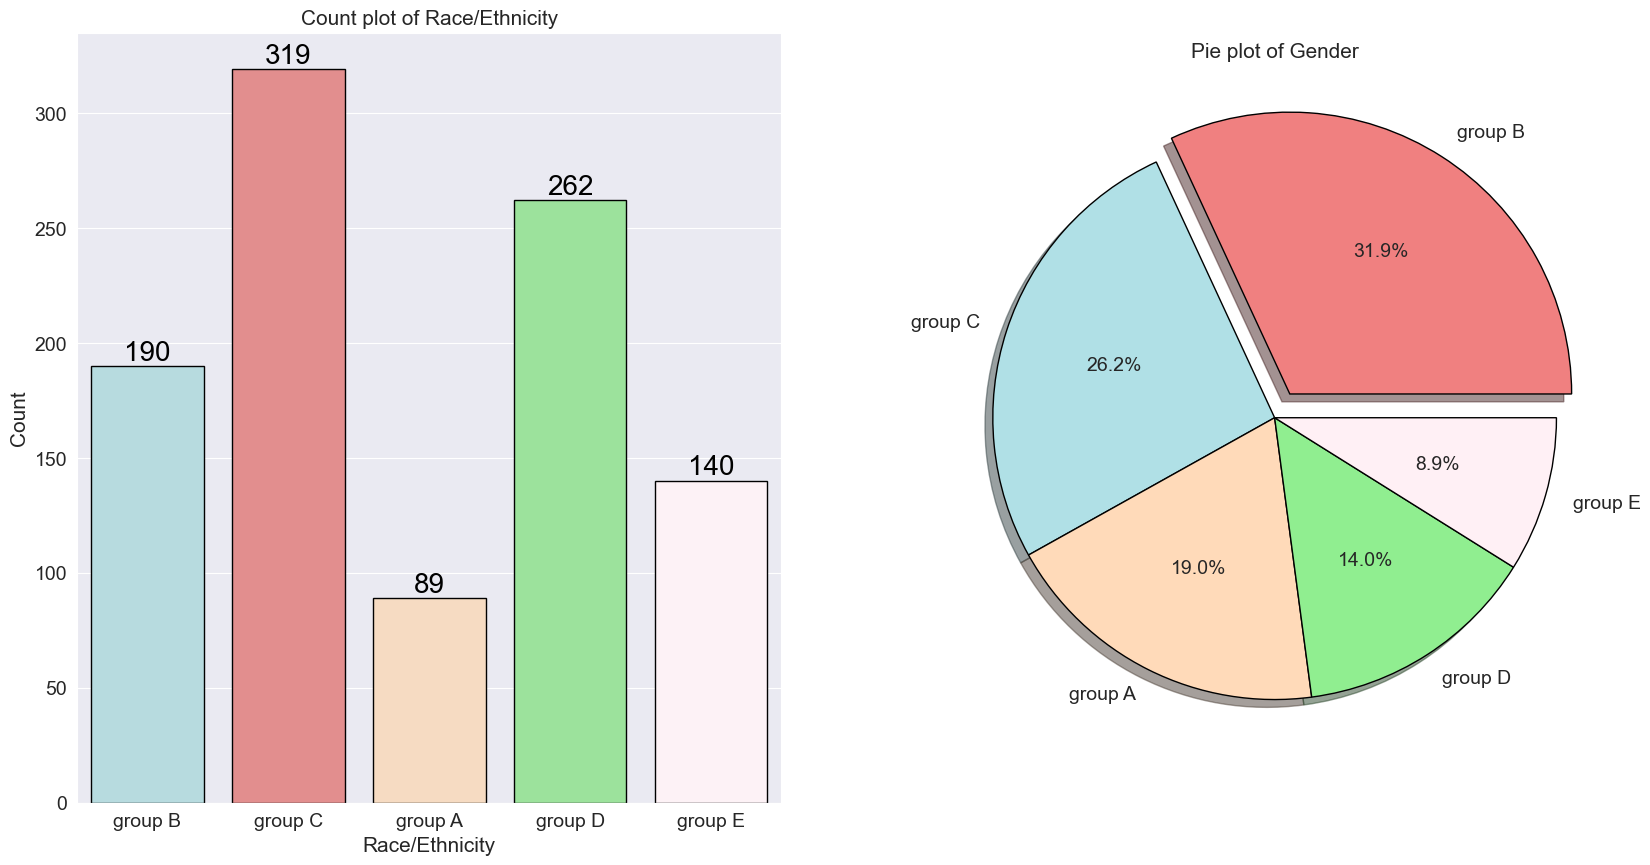

In [476]:
f,ax=plt.subplots(1,2,figsize=(20,10))

custom_palette = ['powderblue','lightcoral','peachpuff','lightgreen','lavenderblush']
sns.countplot(data = df , x = "race_ethnicity" , palette = custom_palette , ax = ax[0], edgecolor = 'black')
ax[0].set_title("Count plot of Race/Ethnicity",fontsize = 15)
ax[0].set_xlabel("Race/Ethnicity",fontsize = 15)
ax[0].set_ylabel("Count",fontsize = 15)
ax[0].tick_params(axis = "both",labelsize = 14)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].unique(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',textprops={'fontsize': 14},
        shadow=True,colors=['lightcoral','powderblue','peachpuff','lightgreen','lavenderblush'], wedgeprops = {"edgecolor":"black"})
plt.title("Pie plot of Gender",fontsize = 15)

plt.show()

##### BIVARIATE ANALYSIS ( is student performance affected by race/ethnicity? )

In [484]:
race_ethnicity_groups = df.groupby('race_ethnicity')

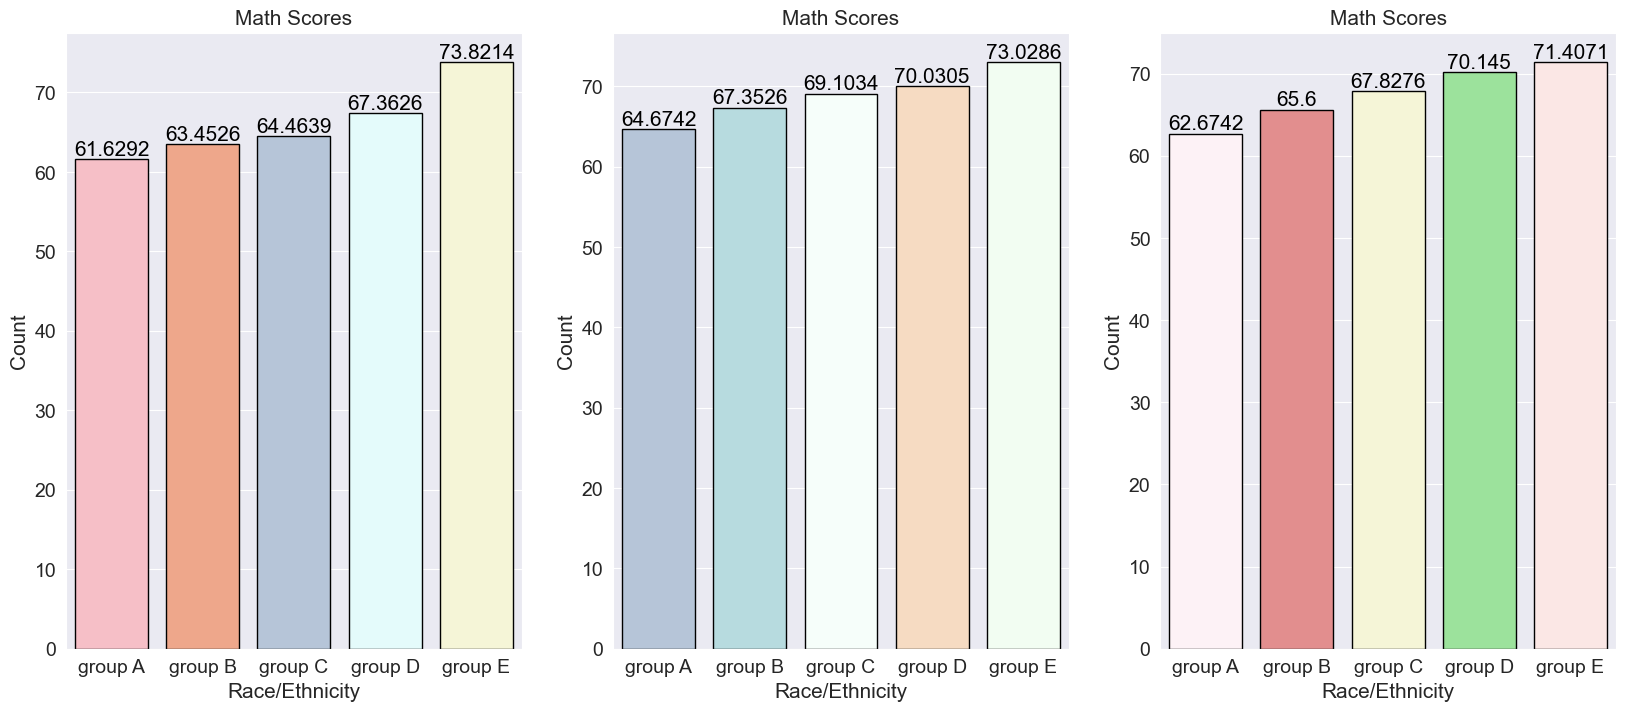

In [528]:
# custom palettes 
custom_palette1 = ['lightpink', 'lightsalmon', 'lightsteelblue', 'lightcyan', 'lightgoldenrodyellow']
custom_palette2 = ['lightsteelblue', 'powderblue', 'mintcream', 'peachpuff', 'honeydew']
custom_palette3 = ['lavenderblush', 'lightcoral', 'lightgoldenrodyellow', 'lightgreen', 'mistyrose']

f,ax = plt.subplots(1,3,figsize = (20,8))
sns.barplot(x = race_ethnicity_groups["math_score"].mean().index, y = race_ethnicity_groups["math_score"].mean().values,palette = custom_palette1
            , ax = ax[0], edgecolor = "black")
ax[0].set_title("Math Scores",fontsize = 15)
ax[0].set_xlabel("Race/Ethnicity",fontsize = 15)
ax[0].set_ylabel("Count",fontsize = 15)
ax[0].tick_params(axis = "both",labelsize = 14)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)


sns.barplot(x = race_ethnicity_groups["reading_score"].mean().index, y = race_ethnicity_groups["reading_score"].mean().values,palette = custom_palette2
            , ax = ax[1], edgecolor = "black")
ax[1].set_title("Math Scores",fontsize = 15)
ax[1].tick_params(axis = "both",labelsize = 14)
ax[1].set_xlabel("Race/Ethnicity",fontsize = 15)
ax[1].set_ylabel("Count",fontsize = 15)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


sns.barplot(x = race_ethnicity_groups["writing_score"].mean().index, y = race_ethnicity_groups["writing_score"].mean().values,palette = custom_palette3
            , ax = ax[2], edgecolor = "black")
ax[2].set_title("Math Scores",fontsize = 15)
ax[2].tick_params(axis = "both",labelsize = 14)
ax[2].set_xlabel("Race/Ethnicity",fontsize = 15)
ax[2].set_ylabel("Count",fontsize = 15)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights:
- It seems that the group E is performing well in all of the tests

#### Parental Level_Of_Education
- what is Parental Level_Of_Education distribution in the dataset?
- does Parental Level_Of_Education has an effect on student performance (average)

##### UNIVARIATE ANALYSIS ( Distribution of features )

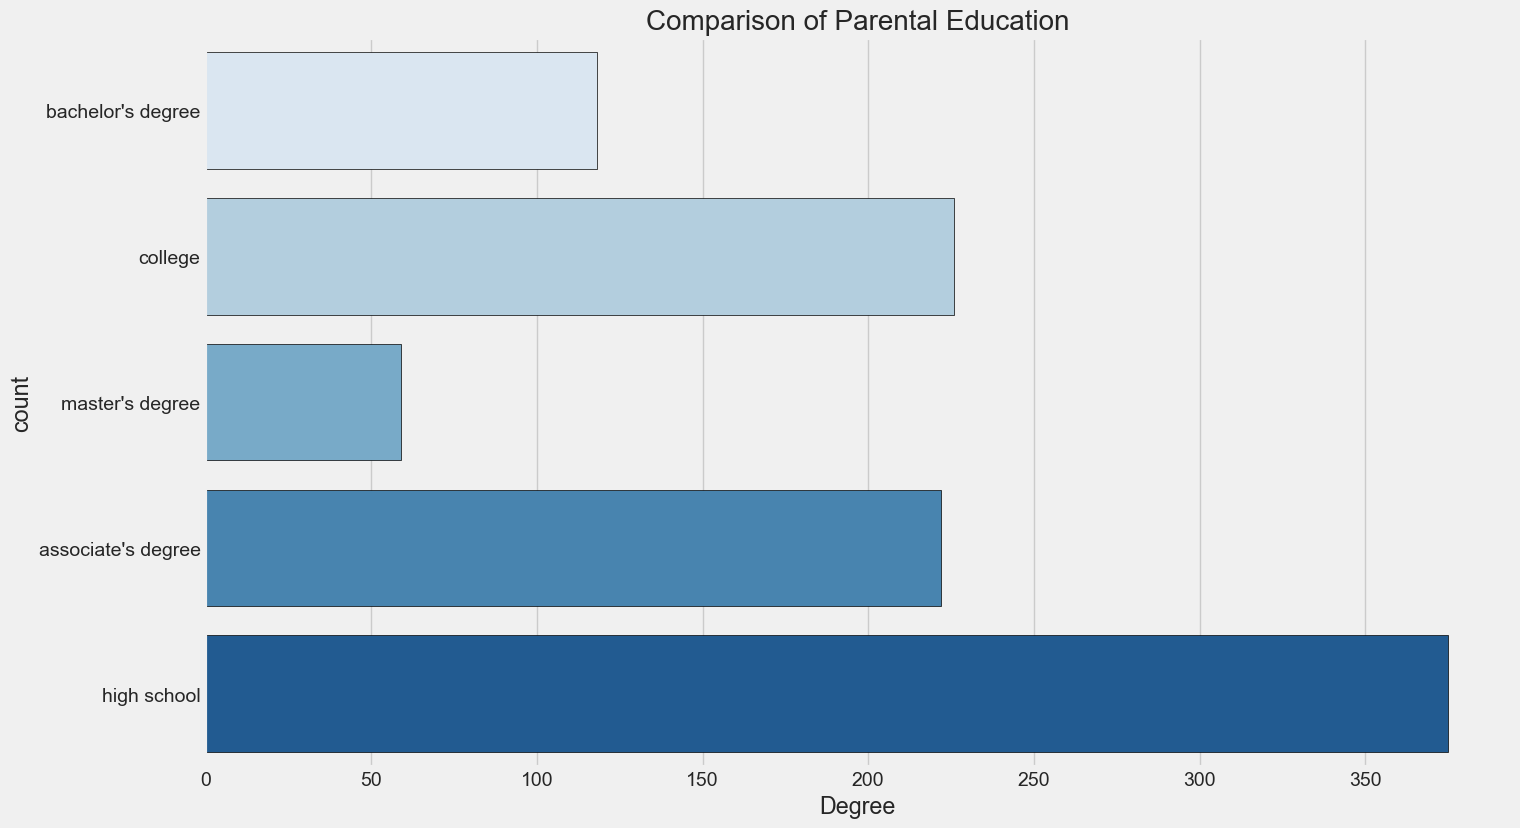

In [541]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues',edgecolor='black')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### BIVARIATE ANALYSIS ( does parental education have any impact on student's performance ? )

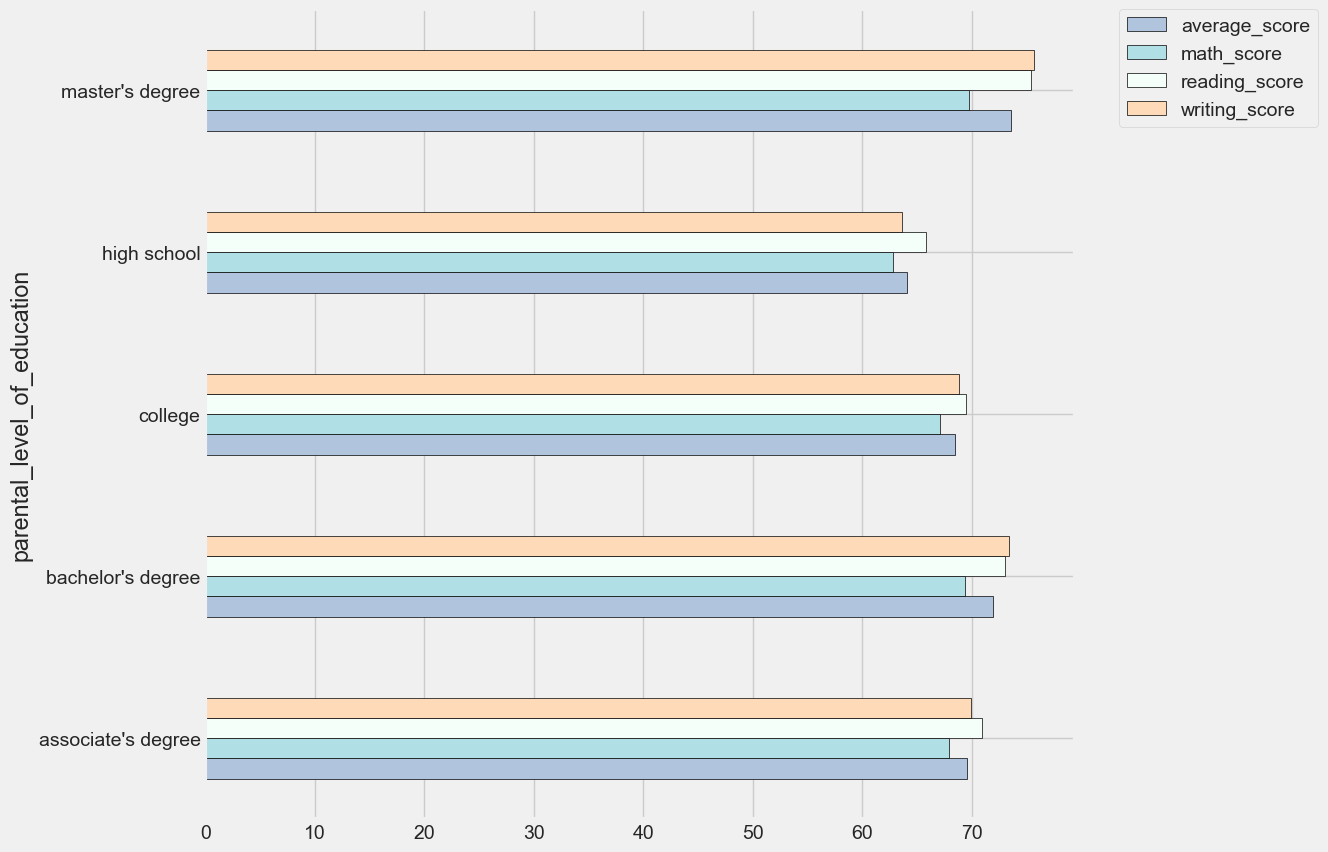

In [559]:
custom_palette2 = ['lightsteelblue', 'powderblue', 'mintcream', 'peachpuff', 'honeydew']
df.groupby('parental_level_of_education')[["average_score","math_score","reading_score","writing_score"]].mean().plot(kind = "barh",
                                                                                                                      color = custom_palette2,
                                                                                                                      figsize = (10,10),
                                                                                                                     edgecolor = "black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights:
- The students who's parents have a degree seems to be performing better in all the exams

#### Lunch
- what is Lunch distribution in the dataset?
- does lunch has an effect on student performance (average)

##### UNIVARIATE ANALYSIS ( Distribution of features )

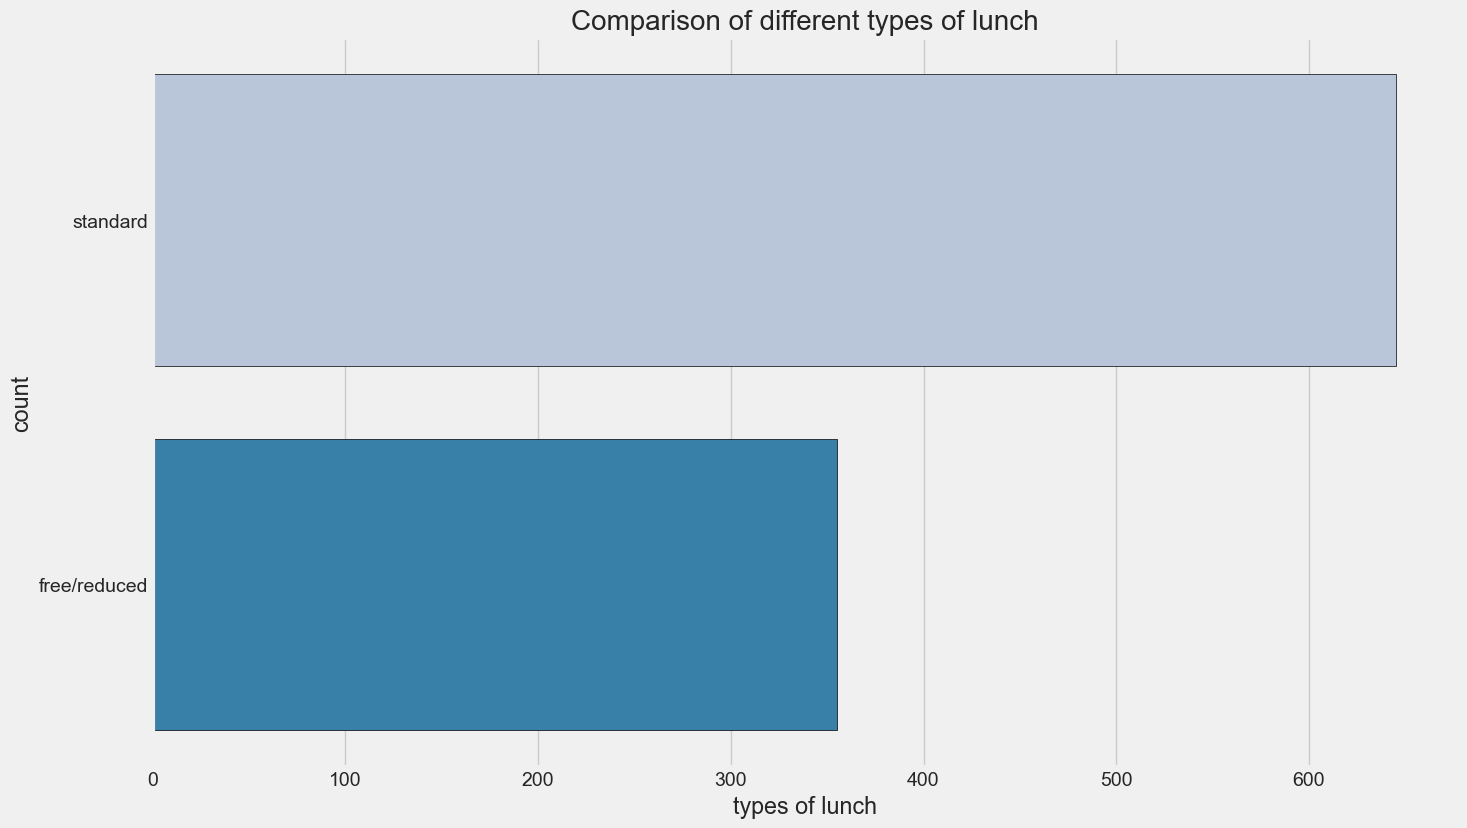

In [606]:
sns.countplot(df['lunch'], palette = 'PuBu', edgecolor = "black")
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

##### BIVARIATE ANALYSIS ( does lunch intake have any impact on student's performance ? )

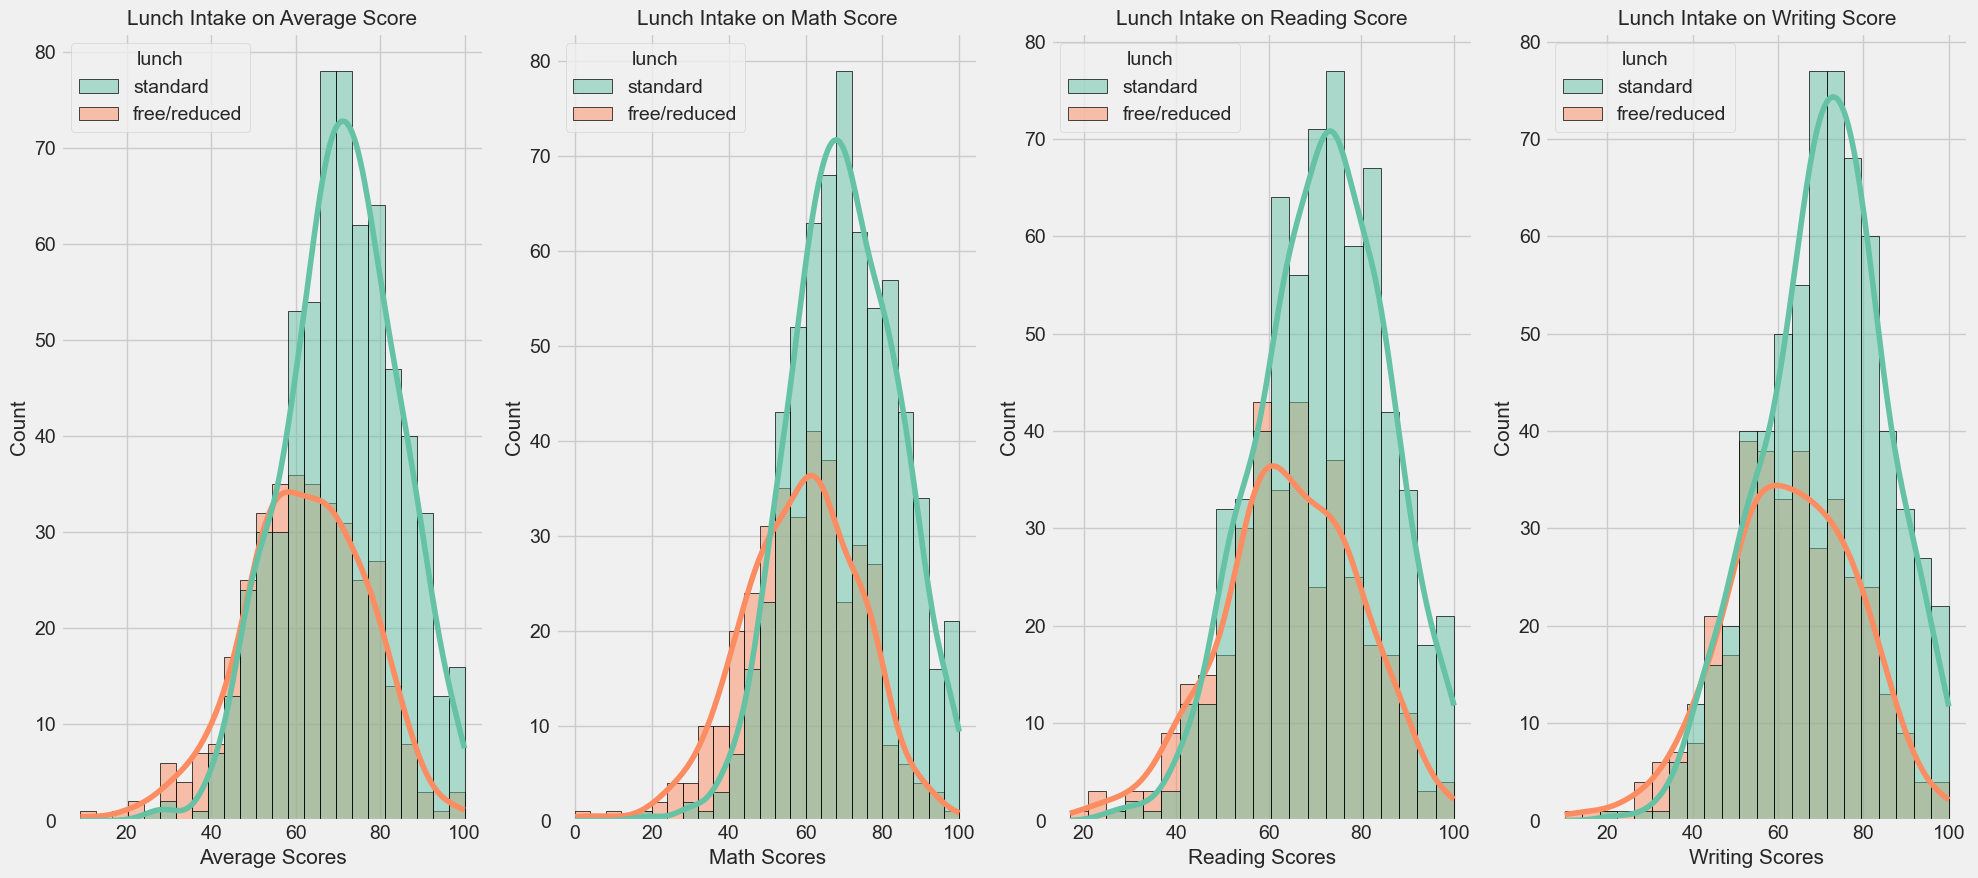

In [608]:
f,ax = plt.subplots(1,4,figsize = (20,9))
sns.histplot(data = df , x = "average_score",hue = "lunch", kde = True , ax = ax[0], palette = "Set2",edgecolor = "black")
ax[0].set_title("Lunch Intake on Average Score",fontsize = 15)
ax[0].set_xlabel("Average Scores",fontsize = 15)
ax[0].set_ylabel("Count",fontsize = 15)

sns.histplot(data = df , x = "math_score",hue = "lunch", kde = True , ax = ax[1], palette = "Set2",edgecolor = "black")
ax[1].set_title("Lunch Intake on Math Score",fontsize = 15)
ax[1].set_xlabel("Math Scores",fontsize = 15)
ax[1].set_ylabel("Count",fontsize = 15)

sns.histplot(data = df , x = "reading_score",hue = "lunch", kde = True , ax = ax[2], palette = "Set2",edgecolor = "black")
ax[2].set_title("Lunch Intake on Reading Score",fontsize = 15)
ax[2].set_xlabel("Reading Scores",fontsize = 15)
ax[2].set_ylabel("Count",fontsize = 15)

sns.histplot(data = df , x = "writing_score",hue = "lunch", kde = True , ax = ax[3], palette = "Set2",edgecolor = "black")
ax[3].set_title("Lunch Intake on Writing Score",fontsize = 15)
ax[3].set_xlabel("Writing Scores",fontsize = 15)
ax[3].set_ylabel("Count",fontsize = 15)

plt.tight_layout()
plt.show()

##### Insights:
- The students who's had standard lunch tend to perform better in the exams than the free lunch consumers

#### Test Preparation Course
- what is Test Preparation Course distribution in the dataset?
- does Test Preparation Course has an effect on student performance (average)

##### UNIVARIATE ANALYSIS ( Distribution of features )

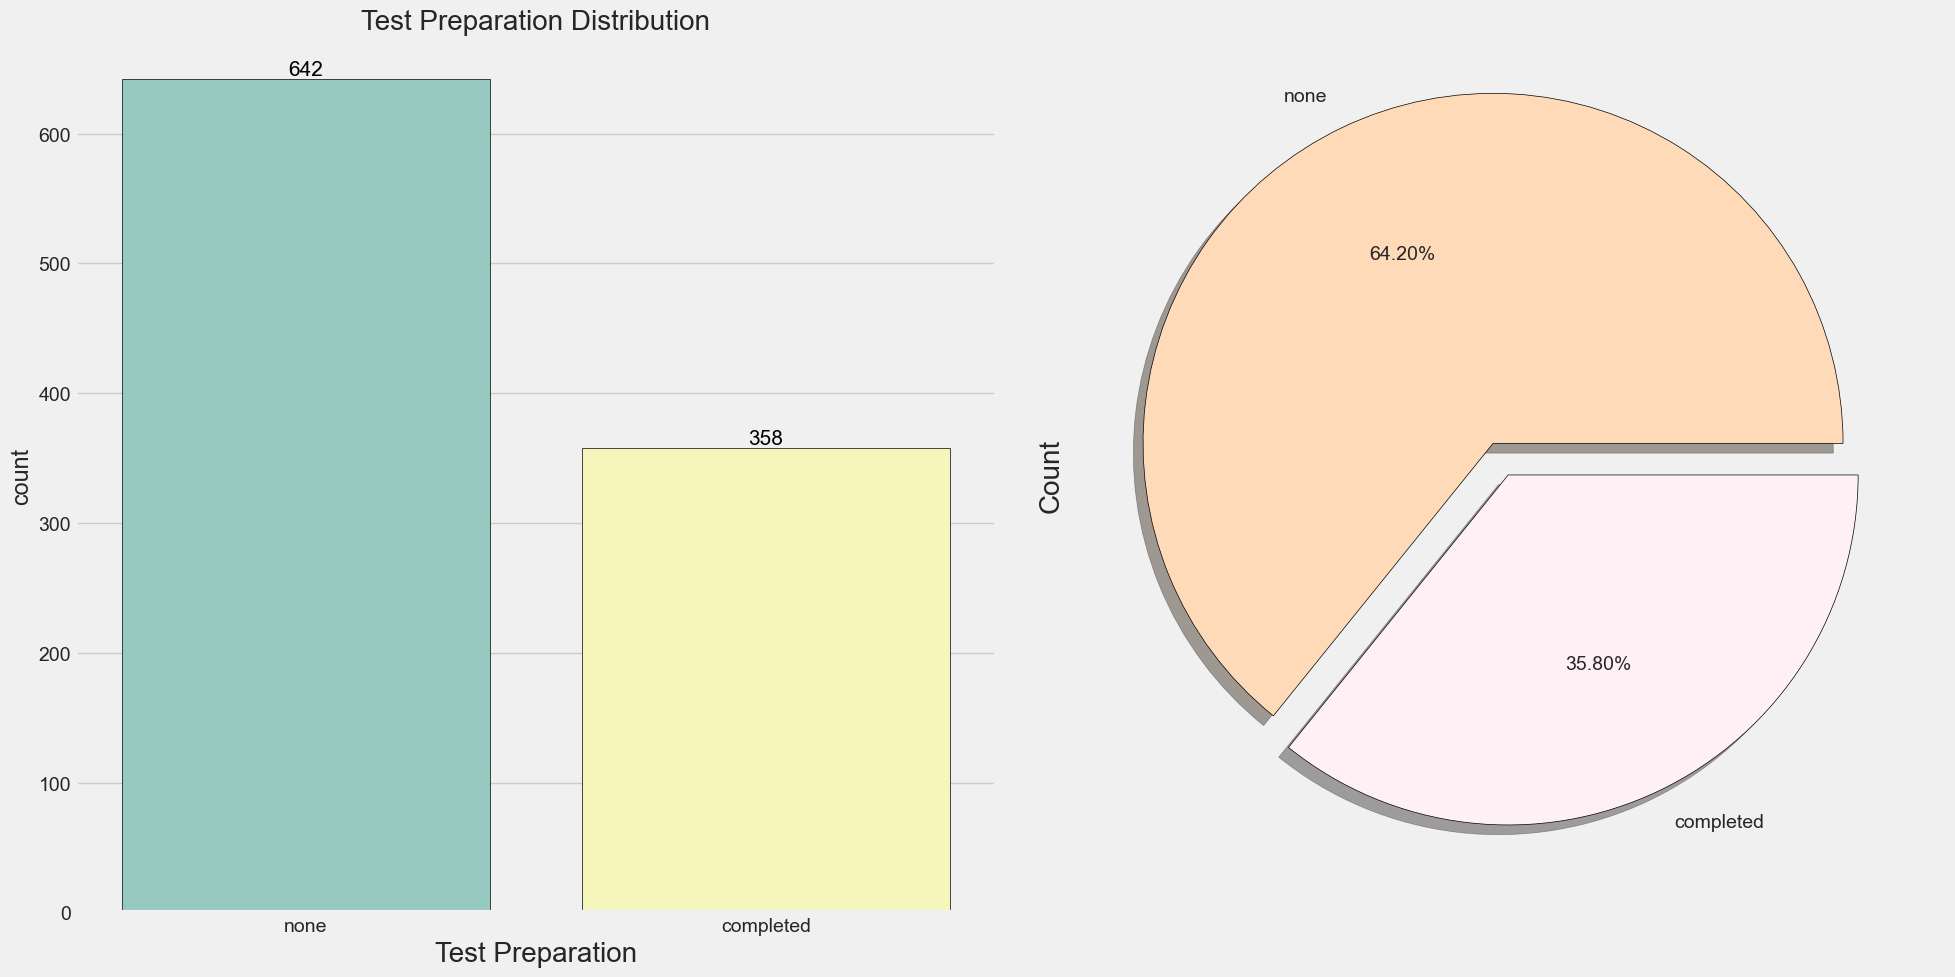

In [735]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(data = df , x = "test_preparation_course",ax = ax[0], palette = "Set3",edgecolor = "black")
ax[0].set_title("Test Preparation Distribution",fontsize = 20)
ax[0].set_xlabel("Test Preparation",fontsize = 20)
ax[1].set_ylabel("Count",fontsize = 20)

for container in ax[0].containers:
    ax[0].bar_label(container,color = "black", size = 15)

plt.pie(x = df["test_preparation_course"].value_counts(),labels = df["test_preparation_course"].unique() , colors = ["peachpuff","lavenderblush"],
        autopct = "%.2f%%" , wedgeprops = {"edgecolor":"black"}, explode = [0.1,0], shadow = 0.55)

plt.tight_layout()
plt.show()

##### BIVARIATE ANALYSIS ( does test preparation course have any impact on student's performance ? )

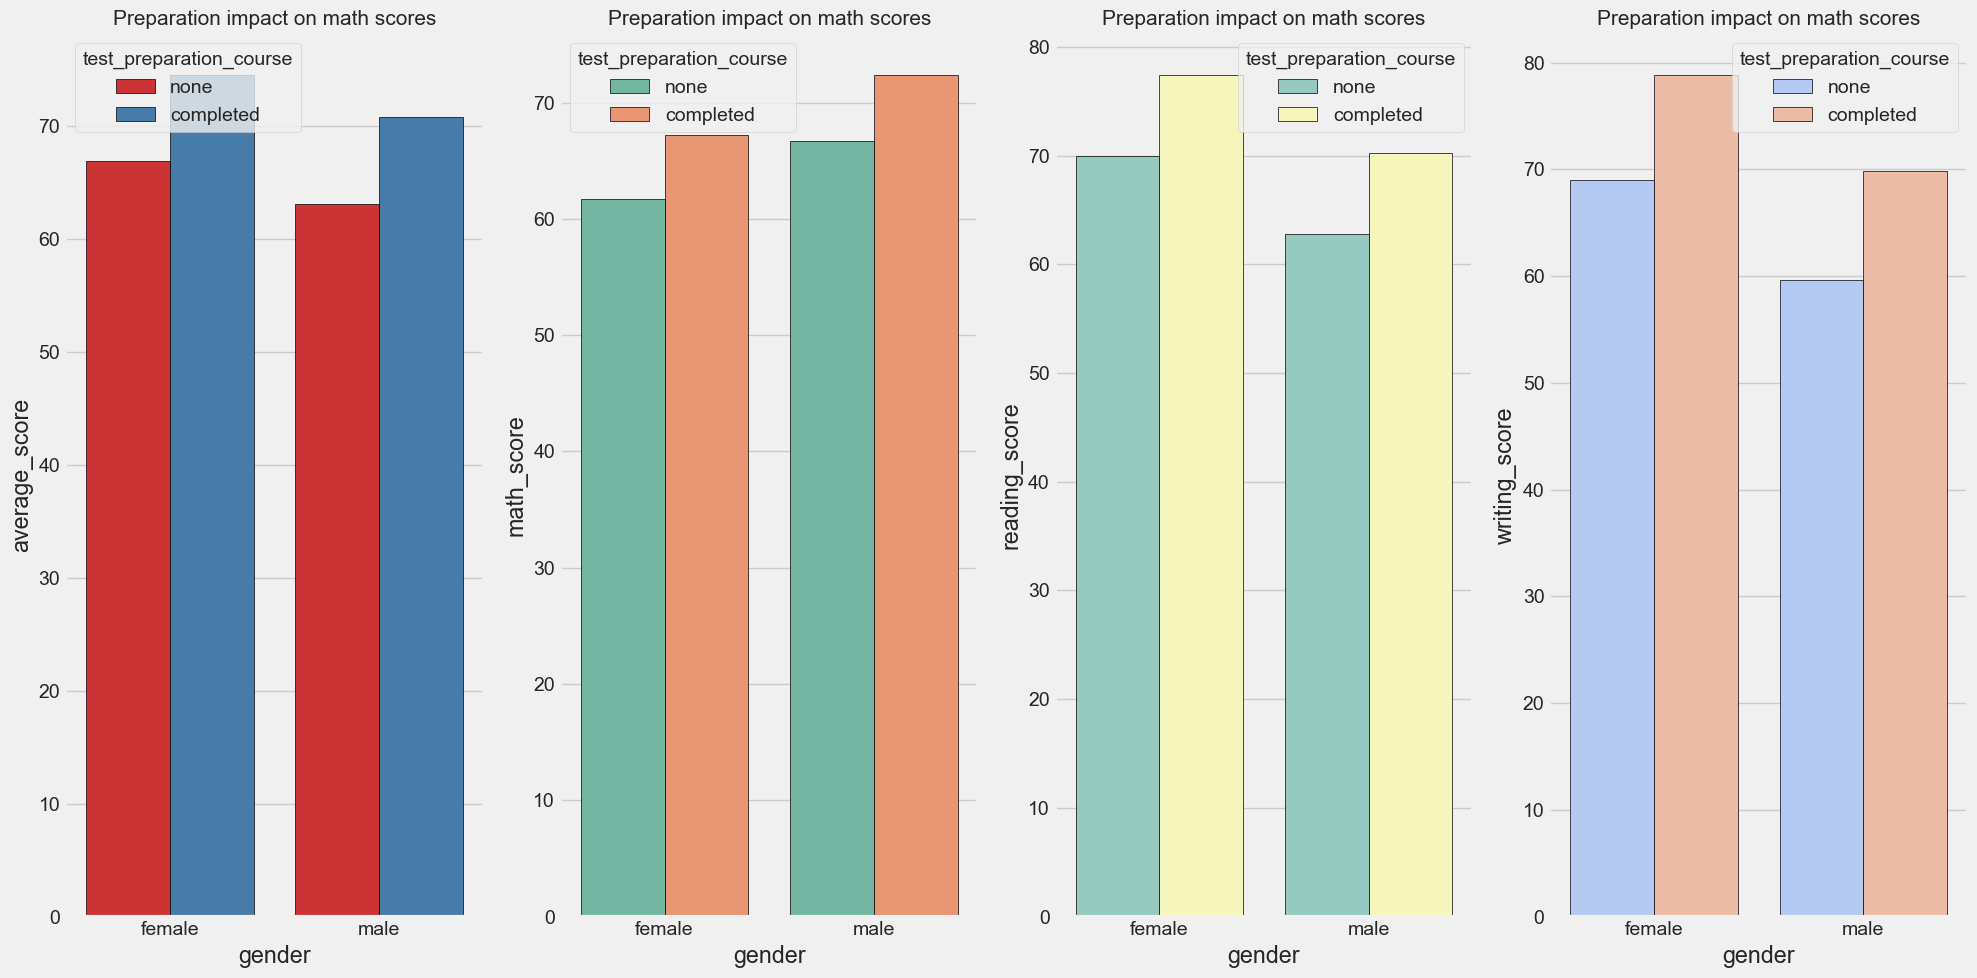

In [701]:
f,ax = plt.subplots(1,4,figsize = (20,10))
sns.barplot(data = df , x = "gender" , y = "average_score", hue = "test_preparation_course", ax = ax[0], ci = None, edgecolor = "black",palette = "Set1")
ax[0].set_title("Preparation impact on math scores",fontsize = 15)

sns.barplot(data = df , x = "gender" , y = "math_score", hue = "test_preparation_course", ax = ax[1], ci = None, edgecolor = "black", palette = "Set2")
ax[1].set_title("Preparation impact on math scores",fontsize = 15)

sns.barplot(data = df , x = "gender" , y = "reading_score", hue = "test_preparation_course", ax = ax[2], ci = None, edgecolor = "black" , palette = "Set3")
ax[2].set_title("Preparation impact on math scores",fontsize = 15)

sns.barplot(data = df , x = "gender" , y = "writing_score", hue = "test_preparation_course", ax = ax[3], ci = None, edgecolor = "black", palette = "coolwarm")
ax[3].set_title("Preparation impact on math scores",fontsize = 15)

plt.tight_layout()
plt.show()

##### Insights:
- The students who's had completed their preparation course have better exam results

### 6.3) MULTIVARIATE ANALYSIS ( Pairplots & Correlation Plot )

#### PAIRPLOTS

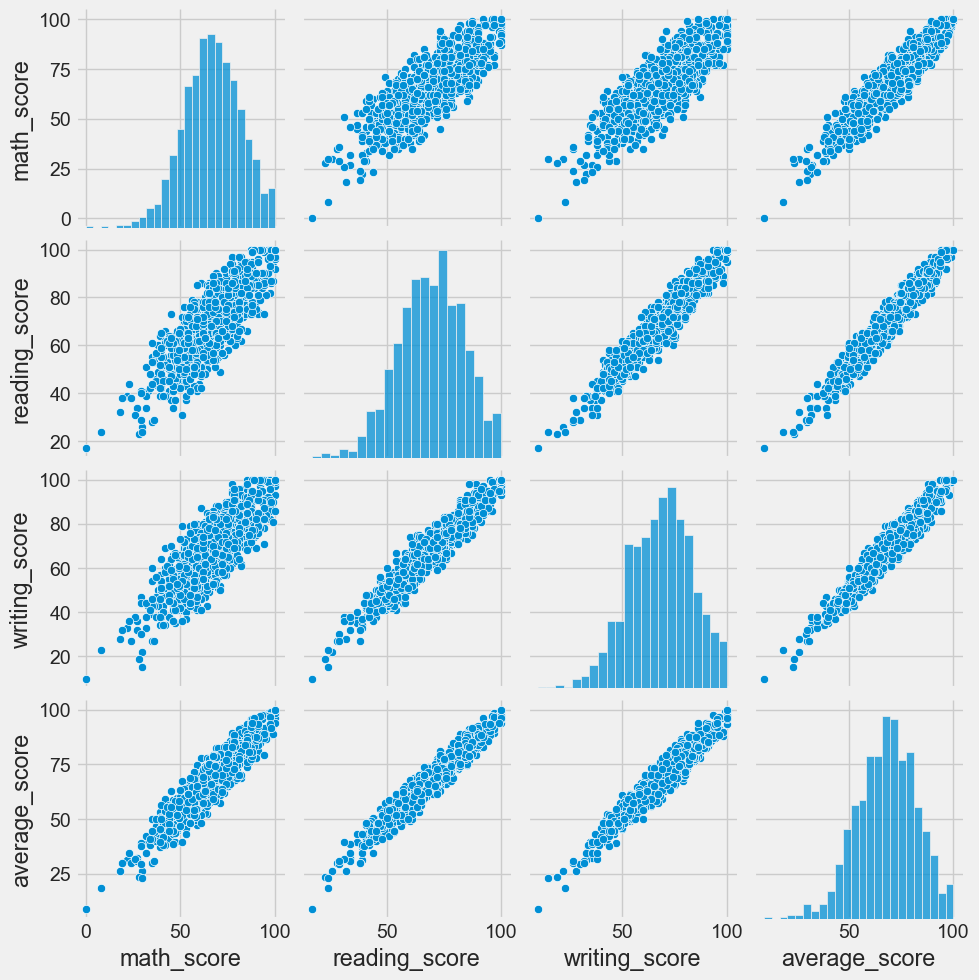

In [754]:
sns.pairplot(data = df,palette = "Set1")
plt.tick_params(axis = "both",labelsize = 5)
plt.show()

##### Insights:
- Each numerical feature has a linear relation with one anohter, this is a very linear dataset. A simple Linear Regression model would perform very well on it

#### CORRELATION HEAT MAP

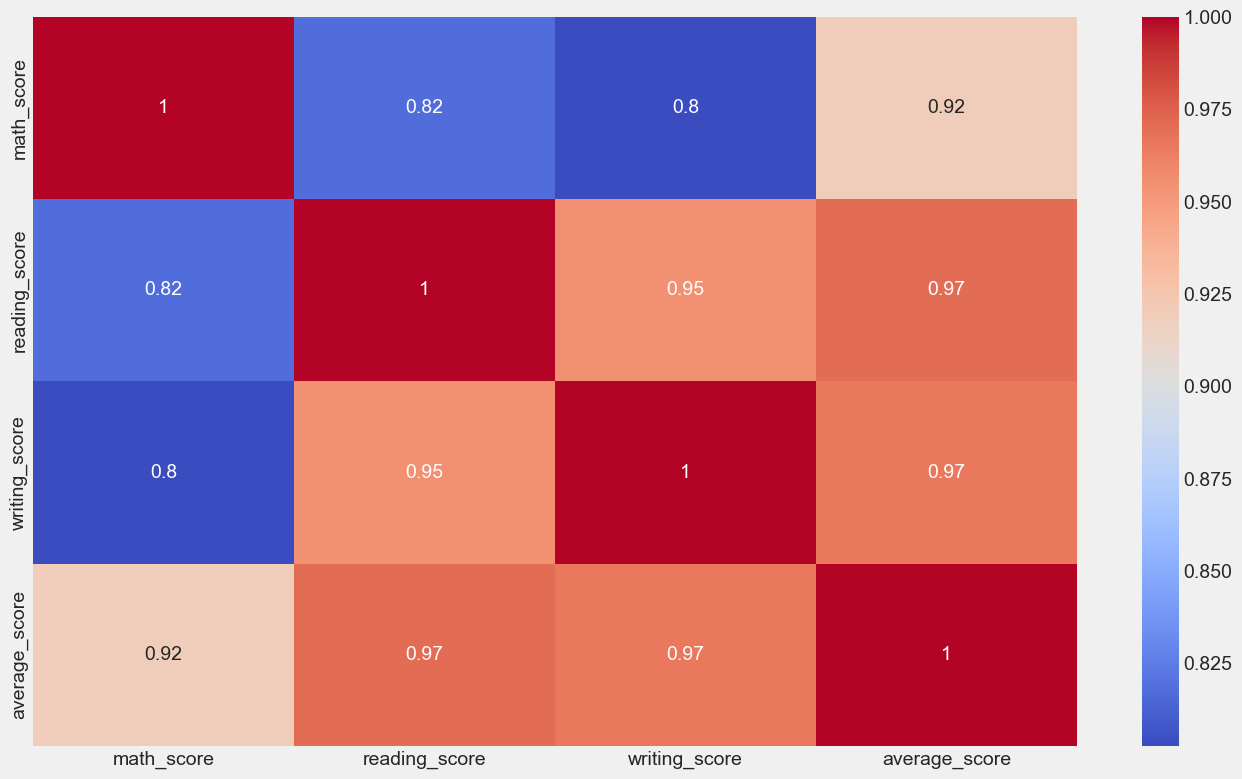

In [763]:
sns.heatmap(df.corr(numeric_only = True), annot = True , cmap = "coolwarm")
plt.show()

# 7) Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance related with test preparation course, finishing preparation course is benefitial.
- The model has linearities